# Lab 1: Proximal Denoising

Welcome to the advanced Large Scale Distributed Optimisation Course.

The objective of this lab session is to handle proximal denoising by denoising an image using wavelets.

We begin with the standard imports:

In [128]:
import numpy as np
import cv2
import pywt
import time
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

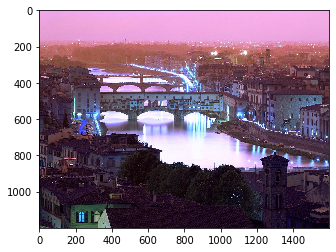

In [24]:
im = cv2.imread('florence.jpg')
plt.imshow(im)

Let's add some random gaussian noise to our image :

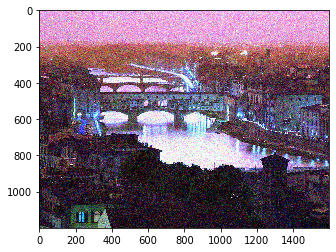

In [4]:
im_noise = im + np.random.normal(0,30,size=im.shape)
im_noise = np.clip(im_noise, 0, 255).astype('int')
plt.imshow(im_noise)

In [120]:
penalizations = {}

penalizations['1'] = lambda eps, khi: np.multiply(np.sign(eps), np.maximum(abs(eps)-khi,np.zeros(eps.shape)))
penalizations['4/3'] = lambda eps, khi: eps + 4*khi * (np.power(np.sqrt(np.power(eps,2)+256*khi**3/729) - eps, 1/3) - 
                                                     np.power(np.sqrt(np.power(eps,2)+256*khi**3/729) + eps, 1/3)) / (3*2**(1/3))
penalizations['3/2'] = lambda eps, khi: eps + np.multiply(9*khi**2*np.sign(eps), 
                                                        1 - np.sqrt(1+16*abs(eps)/(9*khi**2))) / 8
penalizations['2'] = lambda eps, khi: eps / (1 + 2*khi)
penalizations['3'] = lambda eps, khi: np.multiply(np.sign(eps), 
                                                (np.sqrt(1+12*khi*abs(eps)) - 1) / (6*khi))
penalizations['4'] = lambda eps, khi: (np.power((np.sqrt(np.power(eps,2)+1/(27*khi)) + eps)/(8*khi), 1/3) - 
                                     np.power((np.sqrt(np.power(eps,2)+1/(27*khi)) - eps)/(8*khi), 1/3))

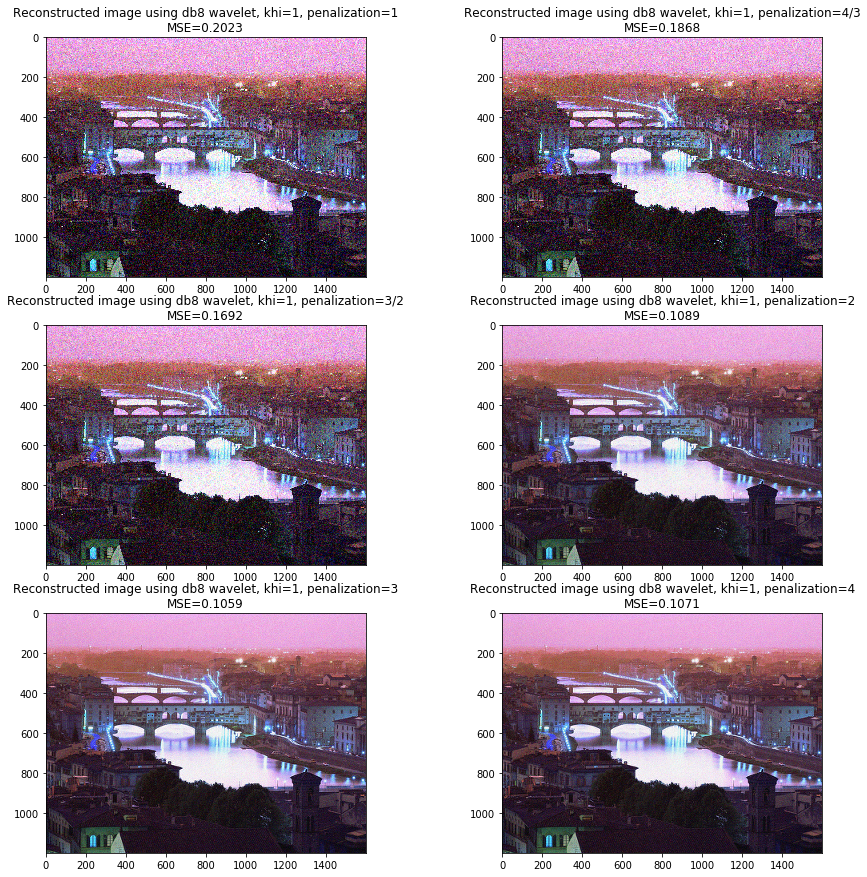

In [126]:
plt.figure(figsize=(15,15))

# Define the parameters
wavelet_types = ['db8', 'Haar','Coif','Sym']
penalization_types = ['1', '4/3', '3/2', '2', '3', '4']
khi = 1

for index, pen in enumerate(penalization_types):
    L = pywt.wavedec2(im_noise,'db8',level=2,axes=(0,1))
    prox_L = [L[0],[penalizations[pen](coef,khi) for coef in L[1]], 
              [penalizations[pen](coef,khi) for coef in L[2]]]
    reconstructed_im = pywt.waverec2(prox_L,'db8',axes=(0,1))
    reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
    plt.subplot(3, len(penalization_types)//3, index+1)
    plt.title('Reconstructed image using {} wavelet, khi={}, penalization={}\nMSE={:.4f}'.format('db8',khi,pen,
                                                np.linalg.norm(im - reconstructed_im)/np.linalg.norm(im)))
    plt.imshow(reconstructed_im)

1/6
It took 155 seconds to finish this iteration.
--------------------------------------------------
2/6
It took 286 seconds to finish this iteration.
--------------------------------------------------
3/6
It took 174 seconds to finish this iteration.
--------------------------------------------------
4/6
It took 116 seconds to finish this iteration.
--------------------------------------------------
5/6
It took 135 seconds to finish this iteration.
--------------------------------------------------
6/6
It took 264 seconds to finish this iteration.
--------------------------------------------------
1/2
It took 129 seconds to finish this iteration.
--------------------------------------------------
2/2
It took 229 seconds to finish this iteration.
--------------------------------------------------


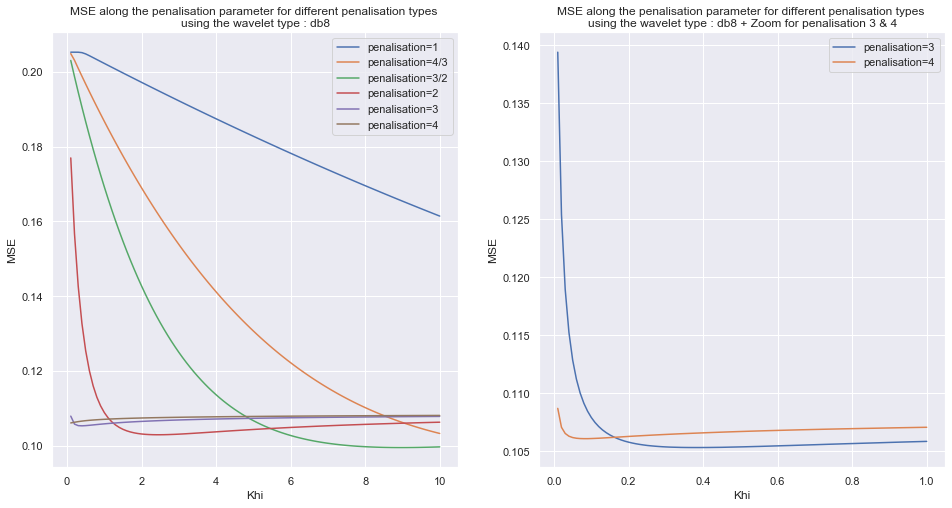

In [147]:
plt.figure(figsize=(16,8))

# Define the parameters
wavelet_types = ['db8', 'Haar', 'Coif', 'Sym']
penalization_types = ['1', '4/3', '3/2', '2', '3', '4']
khi = [k/10 for k in range(1,101)]

ax = plt.subplot(121)
for itr, pen in enumerate(penalization_types):
    print(str(itr+1)+'/6')
    start = time.time()
    MSE = []
    for param in khi:
        L = pywt.wavedec2(im_noise,'db8',level=2,axes=(0,1))
        prox_L = [L[0],[penalizations[pen](coef,param) for coef in L[1]], 
                  [penalizations[pen](coef,param) for coef in L[2]]]
        reconstructed_im = pywt.waverec2(prox_L,'db8',axes=(0,1))
        reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
        MSE.append(np.linalg.norm(im - reconstructed_im)/np.linalg.norm(im))
    plt.plot(khi, MSE, label='penalisation={}'.format(pen))
    end = time.time()
    print('It took {:.0f} seconds to finish this iteration.\n'.format(end-start)+'-'*50)
    
plt.legend()
plt.xlabel("Khi")
plt.ylabel("MSE")
plt.title("MSE along the penalisation parameter for different penalisation types \nusing the wavelet type : db8")
    

khi = [k/100 for k in range(1,101)]

ax = plt.subplot(122)
for itr, pen in enumerate(penalization_types[-2:]):
    print(str(itr+1)+'/2')
    start = time.time()
    MSE = []
    for param in khi:
        L = pywt.wavedec2(im_noise,'db8',level=2,axes=(0,1))
        prox_L = [L[0],[penalizations[pen](coef,param) for coef in L[1]], 
                  [penalizations[pen](coef,param) for coef in L[2]]]
        reconstructed_im = pywt.waverec2(prox_L,'db8',axes=(0,1))
        reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
        MSE.append(np.linalg.norm(im - reconstructed_im)/np.linalg.norm(im))
    plt.plot(khi, MSE, label='penalisation={}'.format(pen))
    end = time.time()
    print('It took {:.0f} seconds to finish this iteration.\n'.format(end-start)+'-'*50)
    
    
plt.legend()
plt.xlabel("Khi")
plt.ylabel("MSE")
plt.title("MSE along the penalisation parameter for different penalisation types \nusing the wavelet type : db8 + Zoom for penalisation 3 & 4")


plt.show()

1/4
It took 119 seconds to finish this iteration.
--------------------------------------------------
2/4
It took 89 seconds to finish this iteration.
--------------------------------------------------
3/4
It took 97 seconds to finish this iteration.
--------------------------------------------------
4/4
It took 90 seconds to finish this iteration.
--------------------------------------------------


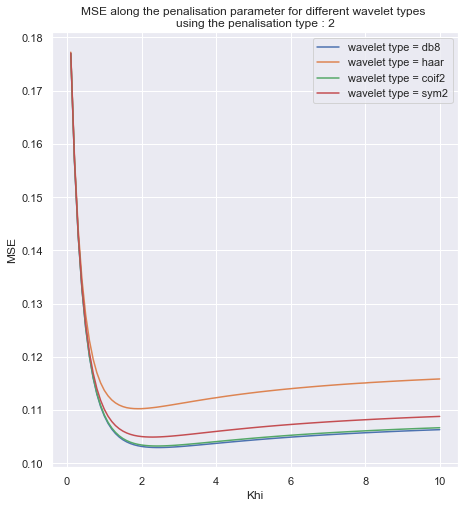

In [150]:
plt.figure(figsize=(16,8))

# Define the parameters
wavelet_types = ['db8', 'haar', 'coif2', 'sym2']
penalization_types = ['1', '4/3', '3/2', '2', '3', '4']
khi = [k/10 for k in range(1,101)]

plt.subplot(121)
for itr, wav in enumerate(wavelet_types):
    print(str(itr+1)+'/4')
    start = time.time()
    MSE = []
    for param in khi:
        L = pywt.wavedec2(im_noise,wav,level=2,axes=(0,1))
        prox_L = [L[0],[penalizations['2'](coef,param) for coef in L[1]], 
                  [penalizations['2'](coef,param) for coef in L[2]]]
        reconstructed_im = pywt.waverec2(prox_L,wav,axes=(0,1))
        reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
        MSE.append(np.linalg.norm(im - reconstructed_im)/np.linalg.norm(im))
    plt.plot(khi, MSE, label='wavelet type = {}'.format(wav))
    end = time.time()
    print('It took {:.0f} seconds to finish this iteration.\n'.format(end-start)+'-'*50)

plt.legend()
plt.xlabel("Khi")
plt.ylabel("MSE")
plt.title("MSE along the penalisation parameter for different wavelet types \nusing the penalisation type : 2")


plt.show()

If you want to know which are the possible wavelets that you can use :

In [140]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

1/10
It took 58 seconds to finish this iteration.
--------------------------------------------------
2/10
It took 58 seconds to finish this iteration.
--------------------------------------------------
3/10
It took 61 seconds to finish this iteration.
--------------------------------------------------
4/10
It took 60 seconds to finish this iteration.
--------------------------------------------------
5/10
It took 67 seconds to finish this iteration.
--------------------------------------------------
6/10
It took 73 seconds to finish this iteration.
--------------------------------------------------
7/10
It took 81 seconds to finish this iteration.
--------------------------------------------------
8/10
It took 87 seconds to finish this iteration.
--------------------------------------------------
9/10
It took 95 seconds to finish this iteration.
--------------------------------------------------
10/10
It took 101 seconds to finish this iteration.
---------------------------------------

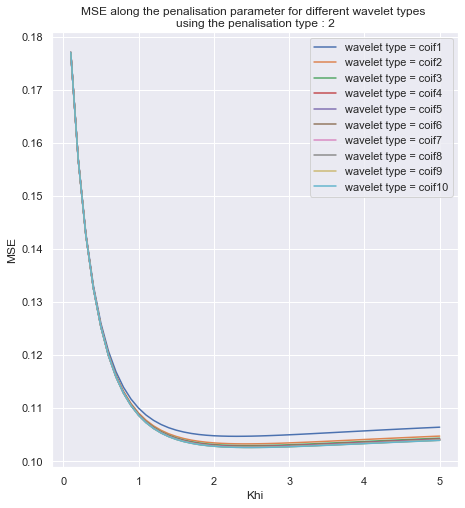

In [149]:
plt.figure(figsize=(16,8))

# Define the parameters
wavelet_types = ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10']
penalization_types = ['1', '4/3', '3/2', '2', '3', '4']
khi = [k/10 for k in range(1,51)]

plt.subplot(121)
for itr, wav in enumerate(wavelet_types):
    print(str(itr+1)+'/10')
    start = time.time()
    MSE = []
    for param in khi:
        L = pywt.wavedec2(im_noise,wav,level=2,axes=(0,1))
        prox_L = [L[0],[penalizations['2'](coef,param) for coef in L[1]], 
                  [penalizations['2'](coef,param) for coef in L[2]]]
        reconstructed_im = pywt.waverec2(prox_L,wav,axes=(0,1))
        reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
        MSE.append(np.linalg.norm(im - reconstructed_im)/np.linalg.norm(im))
    plt.plot(khi, MSE, label='wavelet type = {}'.format(wav))
    end = time.time()
    print('It took {:.0f} seconds to finish this iteration.\n'.format(end-start)+'-'*50)

plt.legend()
plt.xlabel("Khi")
plt.ylabel("MSE")
plt.title("MSE along the penalisation parameter for different wavelet types \nusing the penalisation type : 2")

plt.show()